<a href="https://colab.research.google.com/github/beotavalo/EDA-Bank-Data/blob/main/Exploraci%C3%B3n_y_Segmentaci%C3%B3n_de_Clientes_LT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración y segmentación de clientes

## 1. Carga el dataset
a. Carga el conjunto de datos proporcionado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/SuperBanck.csv")

b. Realiza una evaluación preliminar de los datos. Identifica el número de características, sus tipos de datos y verifica la existencia de valores faltantes.

**Evaluacion preliminar**
- Se verifica las primeras filas del dataset.

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,NaN,0.818182,95.4,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,NaN,201.802084,NaN,0.0,12.0
1,C10002,3202.467416,NaN,0.0,NaN,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,NaN,12.0
2,C10003,2495.148862,1.000000,NaN,773.17,0.0,NaN,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
3,C10004,NaN,0.636364,1499.0,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.0,12.0
4,C10005,817.714335,1.000000,16.0,NaN,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0


- Se verifica la información general del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8055 non-null   float64
 2   BALANCE_FREQUENCY                 8055 non-null   float64
 3   PURCHASES                         8055 non-null   float64
 4   ONEOFF_PURCHASES                  8055 non-null   float64
 5   INSTALLMENTS_PURCHASES            8055 non-null   float64
 6   CASH_ADVANCE                      8055 non-null   float64
 7   PURCHASES_FREQUENCY               8055 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8055 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8055 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8055 non-null   float64
 11  CASH_ADVANCE_TRX                  8055 non-null   float64
 12  PURCHA

Se imprime todas las columnas del dataset

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

**Conclusión:** El dataset tiene una columna de objeto que corresponde a la identidad del cliente, el resto de columnas (17) son numéricas.

**Valores faltantes**

Realizamons el conteo de valores faltantes y el porcentaje que representa respecto al total de numero de filas por cada columna de tipo númerico.

In [ ]:
for col in df.columns:
    miss = df[col].isna().sum()
    if miss > 0:
        percent_missing = (miss / len(df)) * 100
        print(f"La columna {col} tiene un total de {miss} valores faltantes, que representa eñ {percent_missing:.2f}% del total de valores.")

La columna BALANCE tiene un total de 895 valores faltantes, que representa eñ 10.00% del total de valores.
La columna BALANCE_FREQUENCY tiene un total de 895 valores faltantes, que representa eñ 10.00% del total de valores.
La columna PURCHASES tiene un total de 895 valores faltantes, que representa eñ 10.00% del total de valores.
La columna ONEOFF_PURCHASES tiene un total de 895 valores faltantes, que representa eñ 10.00% del total de valores.
La columna INSTALLMENTS_PURCHASES tiene un total de 895 valores faltantes, que representa eñ 10.00% del total de valores.
La columna CASH_ADVANCE tiene un total de 895 valores faltantes, que representa eñ 10.00% del total de valores.
La columna PURCHASES_FREQUENCY tiene un total de 895 valores faltantes, que representa eñ 10.00% del total de valores.
La columna ONEOFF_PURCHASES_FREQUENCY tiene un total de 895 valores faltantes, que representa eñ 10.00% del total de valores.
La columna PURCHASES_INSTALLMENTS_FREQUENCY tiene un total de 895 valore

**Conclusión**: El dataset tiene valores nulos en casi todas sus columnas, con un porcentaje de datos faltantes del 10%, a diferencia de la columna MINIMUN_PAYMENTS que tiene la mayor cantidad de datos faltantes y que corresponde al 13.05% del total de valores.

**Bibliografía:** Código extraído de (Otavalo, 2024). *Loan Eligibility Prediction*. https://github.com/beotavalo/loan-elegibility-prediction/blob/main/notebooks/EDA.ipynb

# 2. Limpieza de Datos:
a. Identifica al menos un mecanismo para imputar datos y justifícalo

b. Elimina datos de ruido si existieran

**Metodología:** Primero se analiza la distribucion de los datos numéricos para identificar valores atípicos, mínimos, máximos, media y varianza, a través del uso de estadística descriptiva y visualizaciones.

- Realizamos estadística descriptiva para todo el dataset

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8054.000000,8055.000000,7782.000000,8055.000000,8055.000000
mean,1564.721016,0.877907,992.203722,593.487287,411.606940,987.140035,0.489973,0.201413,0.366736,0.135315,3.202110,14.736934,4469.021711,1729.655798,855.152072,0.155901,11.519181
std,2077.820226,0.235817,2077.103541,1665.083373,915.321611,2126.252235,0.401603,0.297820,0.397965,0.200593,6.575732,24.815914,3615.216282,2870.333410,2304.057128,0.294644,1.331682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.770565,0.888889,35.955000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,381.405386,169.007295,0.000000,12.000000
50%,876.577775,1.000000,356.150000,40.700000,87.500000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,858.811070,309.367321,0.000000,12.000000
75%,2063.888893,1.000000,1106.160000,575.250000,468.050000,1116.400384,0.916667,0.272727,0.750000,0.222222,4.000000,17.000000,6100.000000,1898.019790,817.732461,0.142857,12.000000
max,19043.138560,1.000000,41050.400000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Mostramos graficos para visualizar la distribución de los datos en base a frecuencia de ocurrencia de valores.

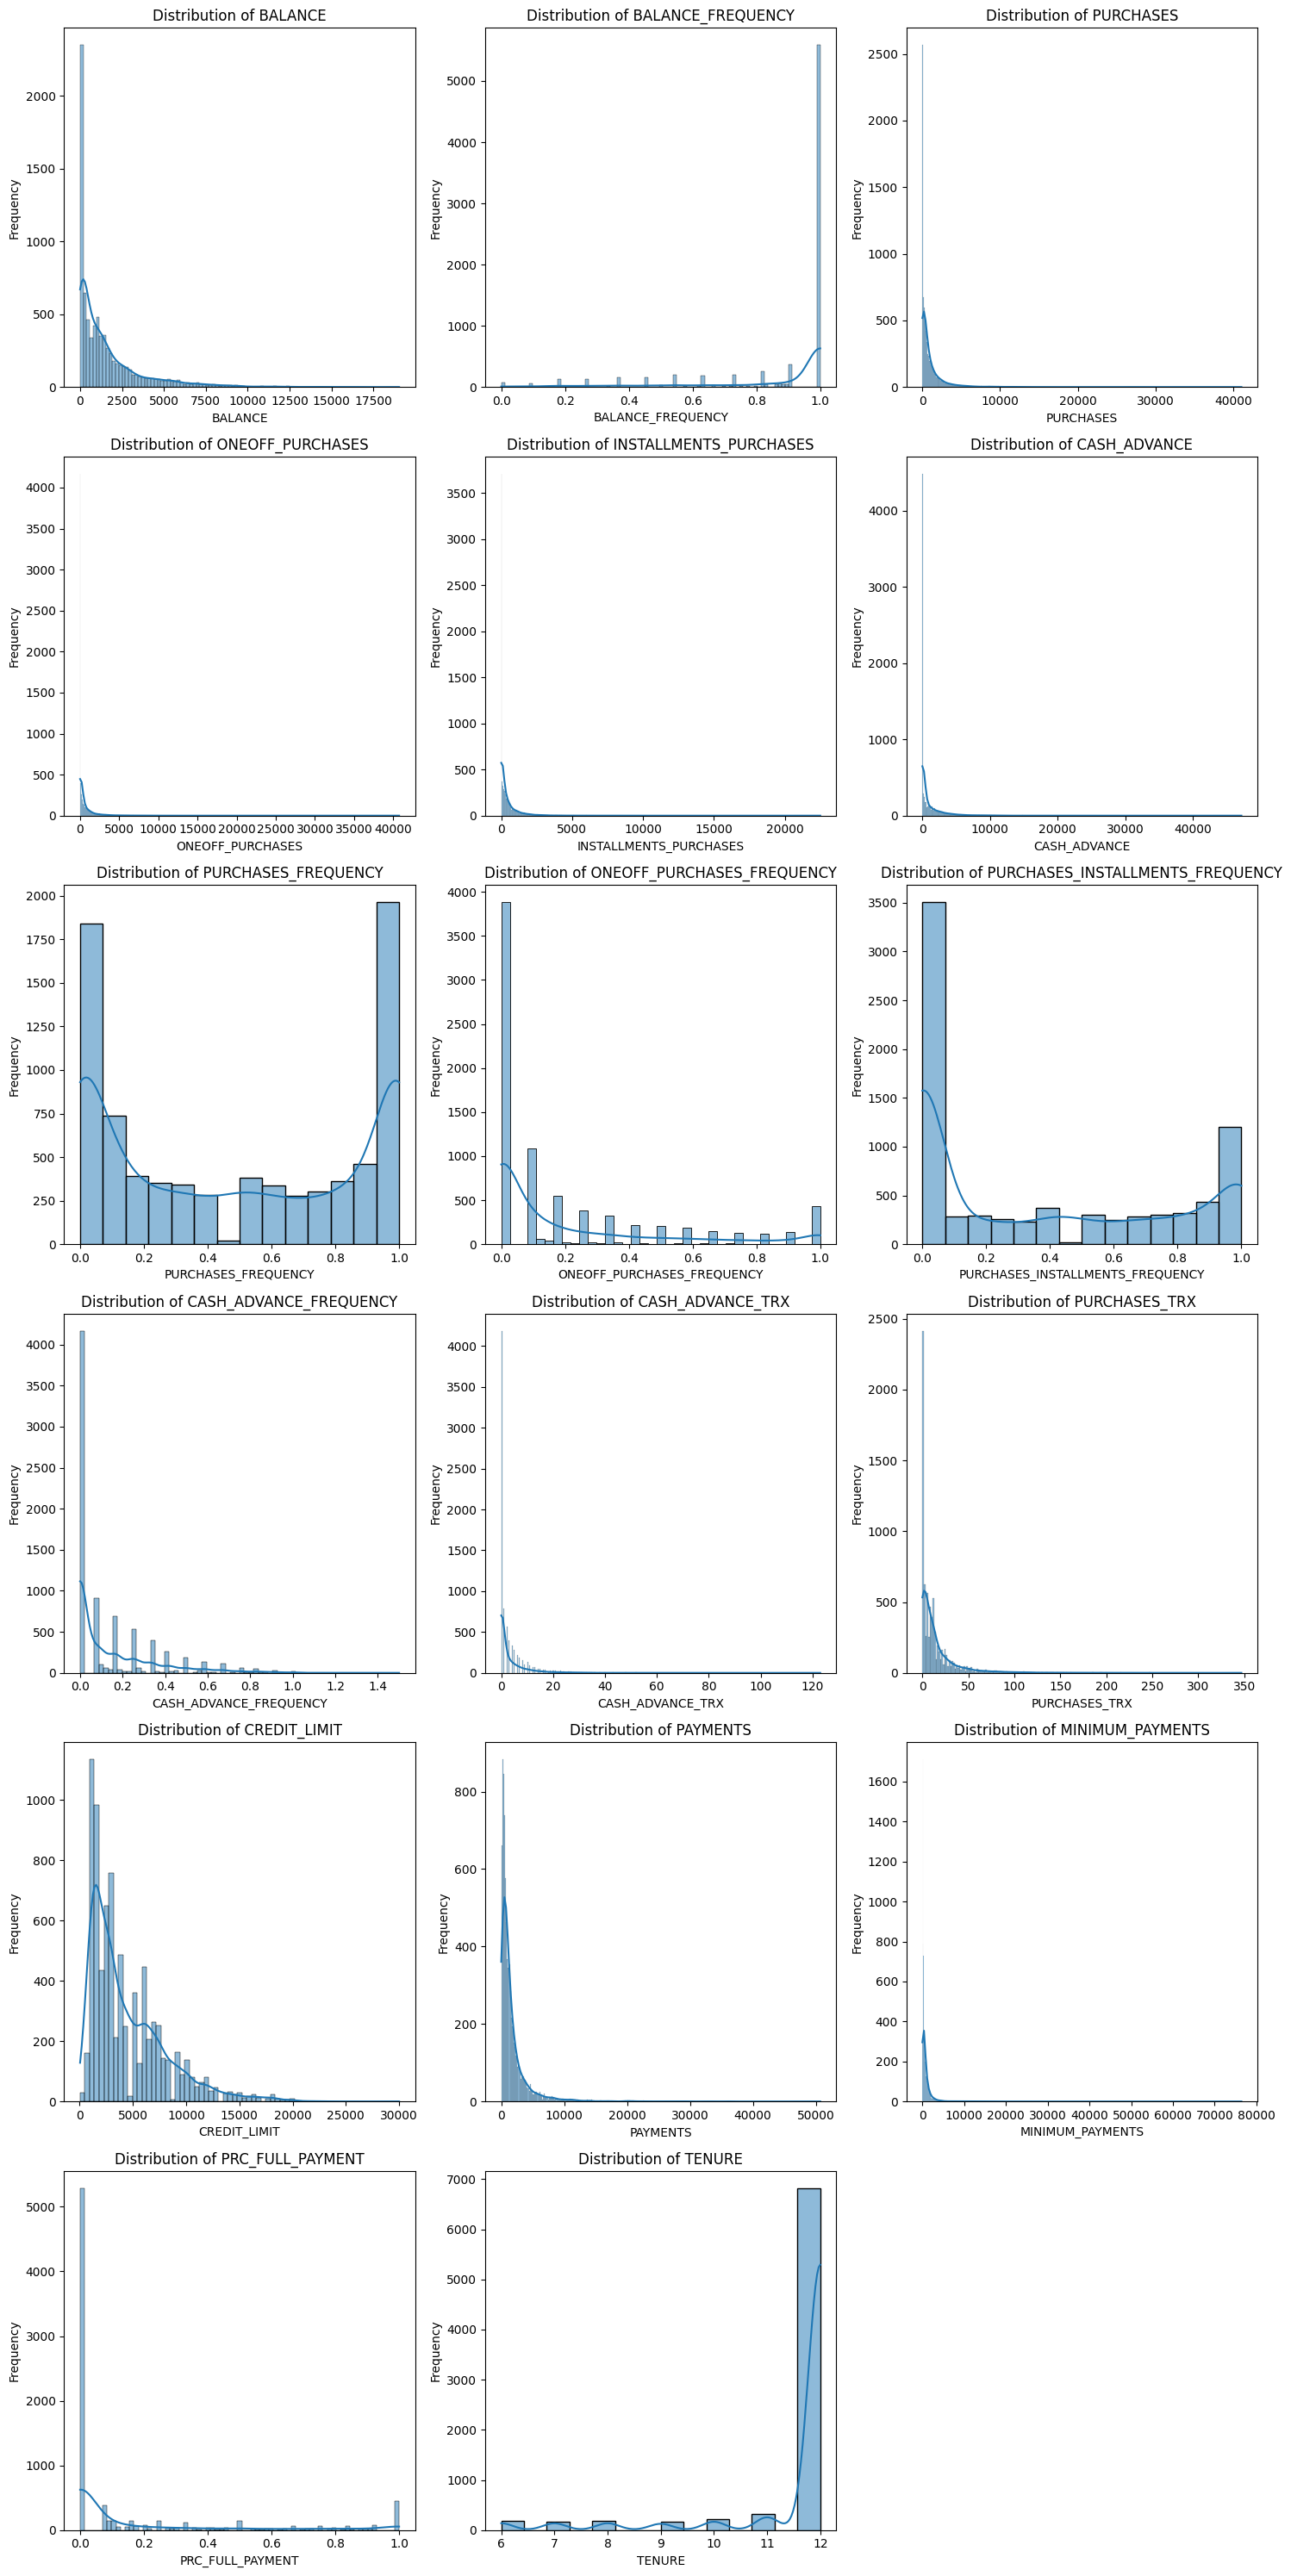

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
num_plots = len(num_cols)

# Calculate the number of rows and columns for the subplot grid
n_rows = (num_plots + 2) // 3  # Adjust the divisor (3) for the number of columns
n_cols = min(num_plots, 3)  # Limit columns to 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, col in enumerate(num_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]  # Handle single-row cases
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_plots, n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    if n_rows > 1:
        axes[row, col_idx].set_axis_off()
    else:
        axes[col_idx].set_axis_off()

plt.tight_layout()
plt.show()

**Imputacion de datos**
Preliminarmente usamos la *mediana* para imputar datos faltantes debido a que es más robusta si los datos son sesgados, ya que no se ve afectada por valores extremos.

In [ ]:
df_inputado = df.copy()

In [ ]:
for col in df_inputado.select_dtypes(include=['number']):
    if df_inputado[col].isnull().any():
        mode_val = df[col].mode()[0]  # Get the first mode value
        df_inputado[col].fillna(mode_val, inplace=True)

<ipython-input-63-48cb29533c7d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_inputado[col].fillna(mode_val, inplace=True)


**Metodología:**
- Se realiza una verificación de que el dataset df_inputado se rellenó con la moda de cada columna.

In [ ]:
df_inputado.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,0.000000,0.818182,95.4,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,3000.0,201.802084,299.351881,0.0,12.0
1,C10002,3202.467416,1.000000,0.0,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.0,12.0
2,C10003,2495.148862,1.000000,0.0,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
3,C10004,0.000000,0.636364,1499.0,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,299.351881,0.0,12.0
4,C10005,817.714335,1.000000,16.0,0.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0


- Se verifica que ninguna columna tenga valores faltantes

In [ ]:
for col in df_inputado.columns:
    miss = df_inputado[col].isna().sum()
    if miss > 0:
        percent_missing = (miss / len(df_inputado)) * 100
        print(f"La columna {col} tiene un total de {miss} valores faltantes, que representa eñ {percent_missing:.2f}% del total de valores.")
    else:
      print(f"No se detecto valores faltantes en la columna {col} del dataset inputado")

No se detecto valores faltantes en la columna CUST_ID del dataset inputado
No se detecto valores faltantes en la columna BALANCE del dataset inputado
No se detecto valores faltantes en la columna BALANCE_FREQUENCY del dataset inputado
No se detecto valores faltantes en la columna PURCHASES del dataset inputado
No se detecto valores faltantes en la columna ONEOFF_PURCHASES del dataset inputado
No se detecto valores faltantes en la columna INSTALLMENTS_PURCHASES del dataset inputado
No se detecto valores faltantes en la columna CASH_ADVANCE del dataset inputado
No se detecto valores faltantes en la columna PURCHASES_FREQUENCY del dataset inputado
No se detecto valores faltantes en la columna ONEOFF_PURCHASES_FREQUENCY del dataset inputado
No se detecto valores faltantes en la columna PURCHASES_INSTALLMENTS_FREQUENCY del dataset inputado
No se detecto valores faltantes en la columna CASH_ADVANCE_FREQUENCY del dataset inputado
No se detecto valores faltantes en la columna CASH_ADVANCE_TRX 

- Se verifica la estadística descriptiva y se realiza un mapa de visualización para corroborar que no hayan datos faltantes en todo el dataframe.

In [ ]:
df_inputado.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.00000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1408.248914,0.890116,892.983350,534.138559,370.446246,888.426031,0.540976,0.181271,0.330062,0.121784,2.881899,13.26324,4321.955403,1556.690219,782.618595,0.140311,11.567263
std,2026.309762,0.226693,1992.859012,1589.630580,877.081782,2038.752825,0.410572,0.288925,0.393246,0.194580,6.311787,23.95387,3457.692900,2772.025315,2156.585564,0.283409,1.271546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,53.227534,0.909091,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.00000,1800.000000,274.218611,176.823097,0.000000,12.000000
50%,645.963657,1.000000,268.800000,0.000000,20.000000,0.000000,0.583333,0.000000,0.083333,0.000000,0.000000,6.00000,3000.000000,716.966977,299.351881,0.000000,12.000000
75%,1846.719594,1.000000,985.297500,469.795000,416.737500,950.339166,1.000000,0.250000,0.714286,0.166667,3.000000,15.00000,6000.000000,1718.481419,700.745566,0.100000,12.000000
max,19043.138560,1.000000,41050.400000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.00000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## **3. Detección y Eliminación de Valores Atípicos:**

a. Identifica posibles valores atípicos en el conjunto de datos utilizando métodos estadísticos (por ejemplo, Z score, Rango intercuartil, etc.).

In [ ]:
def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [ ]:
# Example usage for other numerical columns (replace 'your_column_name' with actual column names)
numerical_columns = df_inputado.select_dtypes(include=np.number).columns
for col in numerical_columns:
  outliers = find_outliers_zscore(df_inputado, col)
  print(f"Outliers in '{col}' column:\n", outliers[col])

Outliers in 'BALANCE' column:
 30      12136.219960
87       8181.251131
90       9381.255094
120      8504.876253
124     14224.115410
            ...     
6838     9321.555794
7132     9024.812044
7427     9220.534572
7764    10856.483010
7962    13318.659120
Name: BALANCE, Length: 204, dtype: float64
Outliers in 'BALANCE_FREQUENCY' column:
 63      0.090909
99      0.000000
129     0.090909
181     0.000000
183     0.090909
          ...   
8753    0.090909
8755    0.090909
8784    0.181818
8854    0.125000
8882    0.125000
Name: BALANCE_FREQUENCY, Length: 302, dtype: float64
Outliers in 'PURCHASES' column:
 125     12462.44
138     22009.92
153      9792.23
204     10848.50
220     11188.62
          ...   
6747     7654.81
7046    26784.62
7378    11994.71
8541     8209.77
8689     8053.95
Name: PURCHASES, Length: 137, dtype: float64
Outliers in 'ONEOFF_PURCHASES' column:
 6        6402.63
21       5910.04
125     12462.44
171      7141.38
204      8208.00
          ...   
7277   

In [ ]:
# Example usage for other numerical columns (replace 'your_column_name' with actual column names)
numerical_columns = df_inputado.select_dtypes(include=np.number).columns
for col in numerical_columns:
  outliers = detect_outliers_iqr(df_inputado, col)
  print(f"Outliers in '{col}' column:\n", outliers[col])

Outliers in 'BALANCE' column:
 15       6886.213231
21       6369.531318
24       5368.571219
28       7152.864372
30      12136.219960
            ...     
8395     4743.748932
8411     5934.610587
8438     5484.339435
8705     7302.672686
8941     5967.475270
Name: BALANCE, Length: 728, dtype: float64
Outliers in 'BALANCE_FREQUENCY' column:
 3       0.636364
9       0.545455
17      0.454545
22      0.636364
34      0.727273
          ...   
8929    0.333333
8937    0.666667
8938    0.500000
8943    0.500000
8949    0.666667
Name: BALANCE_FREQUENCY, Length: 1551, dtype: float64
Outliers in 'PURCHASES' column:
 12      3217.99
21      6359.95
23      4248.35
30      3038.01
51      3107.85
         ...   
8689    8053.95
8737    5633.83
8748    3950.00
8758    2918.08
8897    2806.78
Name: PURCHASES, Length: 833, dtype: float64
Outliers in 'ONEOFF_PURCHASES' column:
 3       1499.00
6       6402.63
11      1492.18
12      2500.23
21      5910.04
         ...   
8758    2918.08
8801   

b. Justifica el método que elegiste para la detección y manejo de valores atípicos.

**Respuesta:** Se selecciona el metodo z-score para identificación de valores atípicos, este método es adecuado si los datos están distribuidos normalmente. De acuerdo a los graficos de distribución del numeral 2,   asumiremos distribución normal. Además, una vez realizado el analisis de valores atipicos, con el indice z-score tenemos menor pérdida de datos 22% (1974 comunas) y con el IQR perderemos el 70% del datset (6273 columnas).

c. Elimina los valores atípicos del conjunto de datos. Describe cómo la eliminación de valores atípicos impacta en el conjunto de datos

In [ ]:
# Identify outlier indices using Z-score
outlier_indices = []
for col in df_inputado.select_dtypes(include=np.number):
    z_scores = np.abs((df_inputado[col] - df_inputado[col].mean()) / df_inputado[col].std())
    outlier_indices.extend(df_inputado[z_scores > 3].index.tolist())

# Remove duplicate indices
outlier_indices = list(set(outlier_indices))

# Remove outliers from the DataFrame
df_inputado = df_inputado.drop(outlier_indices)

print(f"Number of outliers removed: {len(outlier_indices)}")
print(f"Shape of the DataFrame after outlier removal: {df_inputado.shape}")

Number of outliers removed: 1974
Shape of the DataFrame after outlier removal: (6976, 18)


In [ ]:
df_inputado.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000
mean,1188.824904,0.919198,650.699897,375.615338,279.431173,624.995448,0.533342,0.168697,0.320826,0.103311,2.113102,10.629014,3833.926746,1139.093841,555.119007,0.098244,11.776663
std,1471.260947,0.175666,961.267683,730.438501,476.215120,1182.589812,0.407577,0.272013,0.388255,0.155740,3.701046,14.559707,2730.023270,1386.089991,705.485720,0.210474,0.760875
min,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.037744,0.000000,8.000000
25%,67.363392,1.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,1700.000000,280.242705,177.894378,0.000000,12.000000
50%,679.023907,1.000000,262.655000,0.000000,0.000000,0.000000,0.583333,0.000000,0.000000,0.000000,0.000000,6.000000,3000.000000,674.627408,299.351881,0.000000,12.000000
75%,1688.318919,1.000000,888.877500,426.945000,379.290000,781.760773,1.000000,0.250000,0.666667,0.166667,3.000000,14.000000,5000.000000,1445.379259,635.092367,0.083333,12.000000
max,7468.012010,1.000000,6697.570000,5281.170000,2959.240000,6964.780053,1.000000,1.000000,1.000000,0.700000,21.000000,85.000000,14500.000000,9858.055448,7164.306187,0.916667,12.000000


Considerando que el dataset contiene 8950 filas, con el z-score eliminaremos 1974 valores que representa el 22% del dataset. El proposito de la ciencia de datos es poder tener grandes volumenes de datos que nos permitan encontrar hallazgos para promover toma de decisiones, entonces perder datos puede tener consecuencias negativas en los algoritmos aplicados para aprendizaje no supervisado.

In [ ]:

"""# Identify outlier indices using IQR
outlier_indices_iqr = []
for col in df_inputado.select_dtypes(include=np.number):
    Q1 = df_inputado[col].quantile(0.25)
    Q3 = df_inputado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df_inputado[(df_inputado[col] < lower_bound) | (df_inputado[col] > upper_bound)]
    outlier_indices_iqr.extend(outliers_iqr.index.tolist())

# Remove duplicate indices
outlier_indices_iqr = list(set(outlier_indices_iqr))

# Remove outliers from the DataFrame using the collected indices
df_inputado = df_inputado.drop(outlier_indices_iqr)

print(f"Number of outliers removed (IQR): {len(outlier_indices_iqr)}")
print(f"Shape of the DataFrame after outlier removal (IQR): {df_inputado.shape}")
df_inputado.describe()"""

'# Identify outlier indices using IQR\noutlier_indices_iqr = []\nfor col in df_inputado.select_dtypes(include=np.number):\n    Q1 = df_inputado[col].quantile(0.25)\n    Q3 = df_inputado[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    outliers_iqr = df_inputado[(df_inputado[col] < lower_bound) | (df_inputado[col] > upper_bound)]\n    outlier_indices_iqr.extend(outliers_iqr.index.tolist())\n\n# Remove duplicate indices\noutlier_indices_iqr = list(set(outlier_indices_iqr))\n\n# Remove outliers from the DataFrame using the collected indices\ndf_inputado = df_inputado.drop(outlier_indices_iqr)\n\nprint(f"Number of outliers removed (IQR): {len(outlier_indices_iqr)}")\nprint(f"Shape of the DataFrame after outlier removal (IQR): {df_inputado.shape}")\ndf_inputado.describe()'

# 1.3. Transformación de datos

 a. Normalizar o estandarizar los datos numéricos si es necesario. Explica tu elección de técnica.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select only numerical columns for scaling
numerical_cols = df_inputado.select_dtypes(include=np.number).columns

# Fit and transform the numerical features
df_normalized = df_inputado.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_inputado[numerical_cols])

**Explicación:** Para segmentacion de clientes usaremos algoritmos de clustering basado en distancias, como K-Means. Una vez que ya hemos realizado eliminación de valores atipicos usando el z-score usaremos la estandarización

In [ ]:
df_normalized.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03,6.976000e+03
mean,-4.889056e-17,5.866867e-16,-1.140780e-16,4.889056e-17,-1.629685e-17,-1.711169e-16,4.074213e-17,-4.889056e-17,4.481634e-17,1.059295e-16,5.092766e-17,1.222264e-17,1.466717e-16,-1.385232e-16,-8.148426e-18,1.222264e-17,9.696627e-16
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-8.080892e-01,-3.967898e+00,-6.769670e-01,-5.142695e-01,-5.868172e-01,-5.285351e-01,-1.308660e+00,-6.202251e-01,-8.263874e-01,-6.634054e-01,-5.709881e-01,-7.300817e-01,-1.386141e+00,-8.218626e-01,-7.868636e-01,-4.668094e-01,-4.963935e+00
25%,-7.622998e-01,4.600077e-01,-6.769670e-01,-5.142695e-01,-5.868172e-01,-5.285351e-01,-1.104186e+00,-6.202251e-01,-8.263874e-01,-6.634054e-01,-5.709881e-01,-7.300817e-01,-7.817075e-01,-6.196659e-01,-5.347403e-01,-4.668094e-01,2.935478e-01
50%,-3.465310e-01,4.600077e-01,-4.037093e-01,-5.142695e-01,-5.868172e-01,-5.285351e-01,1.226628e-01,-6.202251e-01,-8.263874e-01,-6.634054e-01,-5.709881e-01,-3.179560e-01,-3.054870e-01,-3.351151e-01,-3.625665e-01,-4.668094e-01,2.935478e-01
75%,3.395250e-01,4.600077e-01,2.477922e-01,7.027743e-02,2.097077e-01,1.325705e-01,1.145037e+00,2.989140e-01,8.908195e-01,4.068354e-01,2.396516e-01,2.315450e-01,4.271600e-01,2.209866e-01,1.133674e-01,-7.085039e-02,2.935478e-01
max,4.268201e+00,4.600077e-01,6.290967e+00,6.716385e+00,5.627711e+00,5.361317e+00,1.145037e+00,3.056331e+00,1.749422e+00,3.831597e+00,5.103490e+00,5.108366e+00,3.907233e+00,6.290780e+00,9.368951e+00,3.888759e+00,2.935478e-01


In [ ]:
df_normalized.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.808089,-0.575086,-0.577716,-0.514270,-0.386473,-0.528535,-0.899709,-0.620225,-0.611738,-0.663405,-0.570988,-0.592706,-0.305487,-0.676261,-0.362566,-0.466809,0.293548
1,C10002,1.368749,0.460008,-0.676967,-0.514270,-0.586817,4.920021,-1.308660,-0.620225,-0.826387,0.941953,0.509865,-0.730082,1.159807,2.138498,0.733195,-0.466809,0.293548
2,C10003,0.887958,0.460008,-0.676967,0.544308,-0.586817,-0.528535,1.145037,3.056331,-0.826387,-0.663405,-0.570988,0.094170,1.342969,-0.373038,0.102300,-0.466809,0.293548
3,C10004,-0.808089,-1.610179,0.882544,1.538070,-0.586817,-0.354508,-1.104186,-0.313847,-0.826387,-0.128288,-0.300775,-0.661394,1.342969,-0.821863,-0.362566,-0.466809,0.293548
4,C10005,-0.252258,0.460008,-0.660321,-0.514270,-0.586817,-0.528535,-1.104186,-0.313847,-0.826387,-0.663405,-0.570988,-0.661394,-0.964869,-0.332440,-0.439910,-0.466809,0.293548


 b. Aplica discretización de ser necesaria

**Explicación** Dentro del datset no tenemos variables categoricas en formato texto, preliminarmente no realizaremos descritización.

# 1.4 Análisis Univariado

 a. Selecciona dos variables y realiza un análisis en cada una.

Variables seleccionadas y justificación

**BALANCE:**
Es una métrica clave del saldo disponible para compras, lo que refleja el comportamiento financiero de los clientes.
Será útil para segmentar clientes por solvencia o uso de crédito.

**PURCHASES:**
Representa el gasto total en compras, lo que puede ser útil para identificar patrones de consumo.
Es probable que esta variable influya en la identificación de clientes de alto o bajo gasto.

**CREDIT_LIMIT:**
Define el límite máximo de crédito disponible, lo cual es crucial para caracterizar clientes en función de su capacidad crediticia.
Relacionado directamente con BALANCE y PURCHASES, puede ayudar a identificar clientes que usan más o menos del límite disponible.

 b. Incluye y habla sobre las medidas de tendencia central (media, mediana, modo) y medidas de dispersión (rango, varianza, desviación estándar)

In [ ]:
# Select the three columns for analysis
selected_columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']
subset_df = df_normalized[selected_columns]

Measures of Central Tendency:
Mean:
 BALANCE        -4.889056e-17
PURCHASES      -1.140780e-16
CREDIT_LIMIT    1.466717e-16
dtype: float64

Median:
 BALANCE        -0.346531
PURCHASES      -0.403709
CREDIT_LIMIT   -0.305487
dtype: float64

Mode:
 BALANCE        -0.808089
PURCHASES      -0.676967
CREDIT_LIMIT   -0.305487
Name: 0, dtype: float64


Measures of Dispersion:
Range:
 BALANCE         5.076290
PURCHASES       6.967934
CREDIT_LIMIT    5.293375
dtype: float64

Variance:
 BALANCE         1.000143
PURCHASES       1.000143
CREDIT_LIMIT    1.000143
dtype: float64

Standard Deviation:
 BALANCE         1.000072
PURCHASES       1.000072
CREDIT_LIMIT    1.000072
dtype: float64


In [ ]:
subset_df.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT
count,6.976000e+03,6.976000e+03,6.976000e+03
mean,-4.889056e-17,-1.140780e-16,1.466717e-16
std,1.000072e+00,1.000072e+00,1.000072e+00
min,-8.080892e-01,-6.769670e-01,-1.386141e+00
25%,-7.622998e-01,-6.769670e-01,-7.817075e-01
50%,-3.465310e-01,-4.037093e-01,-3.054870e-01
75%,3.395250e-01,2.477922e-01,4.271600e-01
max,4.268201e+00,6.290967e+00,3.907233e+00


In [ ]:
# Calculate measures of central tendency
mean_values = subset_df.mean()
median_values = subset_df.median()
mode_values = subset_df.mode().iloc[0]  # Get the first mode value for each column

# Calculate measures of dispersion
range_values = subset_df.max() - subset_df.min()
variance_values = subset_df.var()
std_dev_values = subset_df.std()

# Print the results
print("Measures of Central Tendency:")
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

print("\n\nMeasures of Dispersion:")
print("Range:\n", range_values)
print("\nVariance:\n", variance_values)
print("\nStandard Deviation:\n", std_dev_values)

Measures of Central Tendency:
Mean:
 BALANCE        -4.889056e-17
PURCHASES      -1.140780e-16
CREDIT_LIMIT    1.466717e-16
dtype: float64

Median:
 BALANCE        -0.346531
PURCHASES      -0.403709
CREDIT_LIMIT   -0.305487
dtype: float64

Mode:
 BALANCE        -0.808089
PURCHASES      -0.676967
CREDIT_LIMIT   -0.305487
Name: 0, dtype: float64


Measures of Dispersion:
Range:
 BALANCE         5.076290
PURCHASES       6.967934
CREDIT_LIMIT    5.293375
dtype: float64

Variance:
 BALANCE         1.000143
PURCHASES       1.000143
CREDIT_LIMIT    1.000143
dtype: float64

Standard Deviation:
 BALANCE         1.000072
PURCHASES       1.000072
CREDIT_LIMIT    1.000072
dtype: float64


**1. Medidas de Tendencia Central**
**Media (Mean):**

Valores cercanos a cero: Las medias de todas las variables están muy cerca de 0, lo cual es esperado tras la estandarización, ya que este proceso ajusta los datos para que tengan una media de 0 y una desviación estándar de 1.
*Interpretación:*
Estos valores confirman que los datos han sido transformados correctamente para su uso en técnicas como clustering.

**Mediana (Median):**

Valores:
BALANCE: -0.35
PURCHASES: -0.40
CREDIT_LIMIT: -0.31
*Interpretación:*
Las medianas están ligeramente desplazadas hacia valores negativos, lo que podría indicar una ligera asimetría en la distribución de las variables.
Esto sugiere que, incluso después de la estandarización, hay más valores por debajo de la media que por encima.

**Moda (Mode):**

Valores:
BALANCE: -0.81
PURCHASES: -0.68
CREDIT_LIMIT: -0.31
*Interpretación:*
La moda indica los valores más frecuentes en el dataset.
La moda de estas variables es distinta a la mediana, lo que podría reflejar la presencia de agrupaciones específicas o distribuciones sesgadas.

**2. Medidas de Dispersión**
**Rango (Range):**

Valores:
BALANCE: 5.08
PURCHASES: 6.97
CREDIT_LIMIT: 5.29
*Interpretación:*
Estas diferencias muestran que PURCHASES tiene la mayor amplitud en sus valores estandarizados, lo que implica que hay mayor variabilidad en los montos gastados en comparación con los saldos o límites de crédito.

**Varianza (Variance):**
Valores:
Todas las variables tienen una varianza de aproximadamente 1, lo cual es característico de datos estandarizados.
    
*Interpretación:*
 Esto confirma que el proceso de estandarización fue exitoso.

Desviación Estándar (Standard Deviation):

Valores:
Todas las variables tienen una desviación estándar de aproximadamente 1, lo que coincide con la varianza y valida la estandarización.

 c. Proporciona al menos una visualización (por ejemplo, histogramas, diagramas de caja) por cada variable seleccionada.

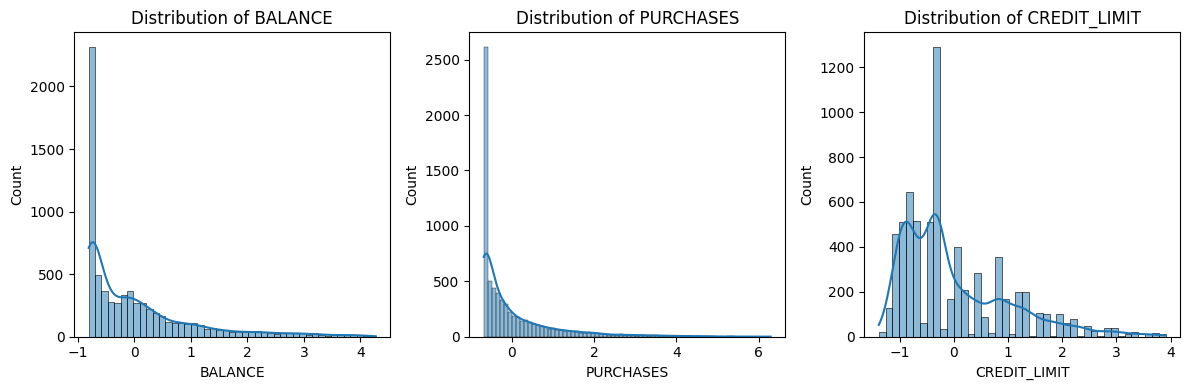

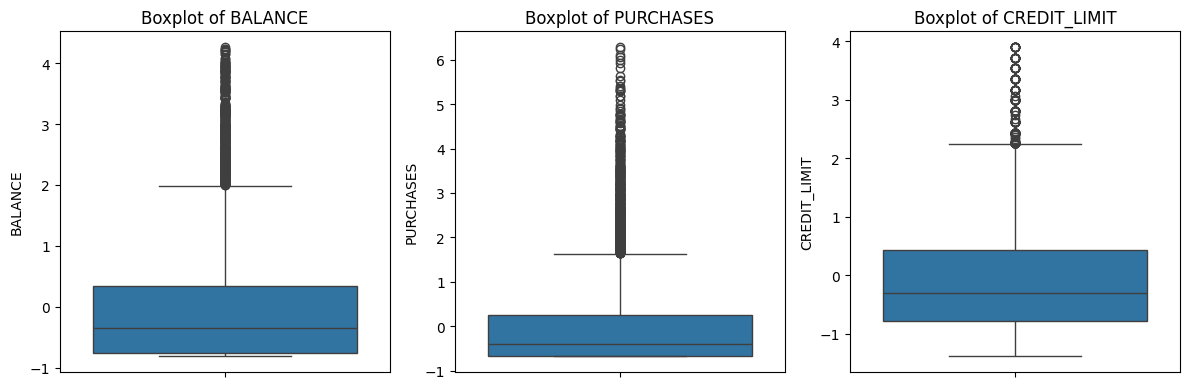

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_normalized['BALANCE'], kde=True)
plt.title('Distribution of BALANCE')

plt.subplot(1, 3, 2)
sns.histplot(df_normalized['PURCHASES'], kde=True)
plt.title('Distribution of PURCHASES')

plt.subplot(1, 3, 3)
sns.histplot(df_normalized['CREDIT_LIMIT'], kde=True)
plt.title('Distribution of CREDIT_LIMIT')

plt.tight_layout()
plt.show()

# Create box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_normalized['BALANCE'])
plt.title('Boxplot of BALANCE')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_normalized['PURCHASES'])
plt.title('Boxplot of PURCHASES')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_normalized['CREDIT_LIMIT'])
plt.title('Boxplot of CREDIT_LIMIT')

plt.tight_layout()
plt.show()

Podemos observar:

**Balance:**

La distribución es ligeramente asimétrica hacia la derecha, ya que la mediana está más cerca del borde inferior de la caja.

El 50% central de los datos se encuentra entre los valores Q1 y Q3.

Hay algunos valores atípicos en el extremo superior de la distribución.

# 1.5 Generación de Insights

 a. Basado en el análisis realizado, infiere al menos un insight del conjunto de datos, considerando el contexto del problema.

** Realizamos analisis bivariado:
**Correlacion:**

Correlation Matrix:
               BALANCE  PURCHASES  CREDIT_LIMIT
BALANCE       1.000000   0.039579      0.349076
PURCHASES     0.039579   1.000000      0.244467
CREDIT_LIMIT  0.349076   0.244467      1.000000


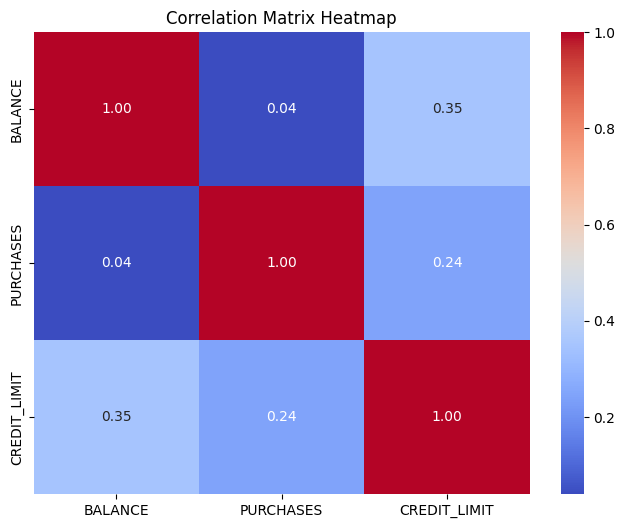

In [ ]:
# Select the three columns for analysis
selected_columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']
subset_df = df_normalized[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Diagrama de dispersion**

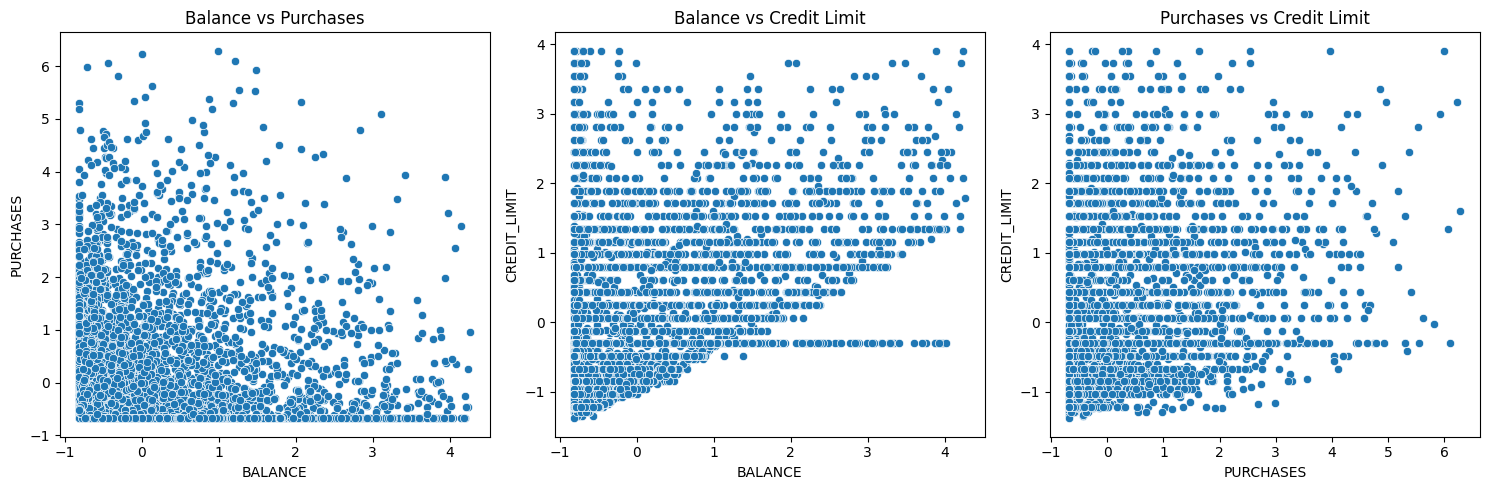

In [ ]:

# Create scatter plots in subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Balance vs Purchases
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df_normalized, ax=axes[0])
axes[0].set_title('Balance vs Purchases')

# Balance vs Credit Limit
sns.scatterplot(x='BALANCE', y='CREDIT_LIMIT', data=df_normalized, ax=axes[1])
axes[1].set_title('Balance vs Credit Limit')

# Purchases vs Credit Limit
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', data=df_normalized, ax=axes[2])
axes[2].set_title('Purchases vs Credit Limit')

plt.tight_layout()
plt.show()

**Diagrama de dispersion 3D**

In [ ]:
# 3D Plot
import plotly.express as px

# Assuming df_normalized is your DataFrame and you want to plot 'BALANCE', 'PURCHASES', and 'CREDIT_LIMIT'
fig = px.scatter_3d(df_normalized, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT',
                    title='3D Scatter Plot of BALANCE, PURCHASES, and CREDIT_LIMIT')

fig.show()

 b. Cada insight debe estar respaldado por evidencia estadística y visualizaciones pertinentes.

Insight 1: Relación entre saldo (BALANCE) y límite de crédito (CREDIT_LIMIT)

*Evidencia estadística:*

    La correlación entre BALANCE y CREDIT_LIMIT es moderada y positiva (r=0.349), lo que indica que los clientes con un mayor límite de crédito tienden a tener saldos más altos.

    Esto sugiere que los clientes con mayor capacidad crediticia utilizan una porción proporcional de su límite para mantener un saldo mayor.


*Relevancia para el problema:*

    Este insight puede ser utilizado por Super Bank para ajustar las estrategias de asignación de límites de crédito. Por ejemplo, los clientes con saldos consistentemente bajos podrían ser candidatos para recibir ofertas de incremento de límite de crédito para incentivar su uso.



**Visualización:**
Se presenta un gráfico de dispersión entre BALANCE y CREDIT_LIMIT, destacando la tendencia positiva con (un modelo de linear regression).

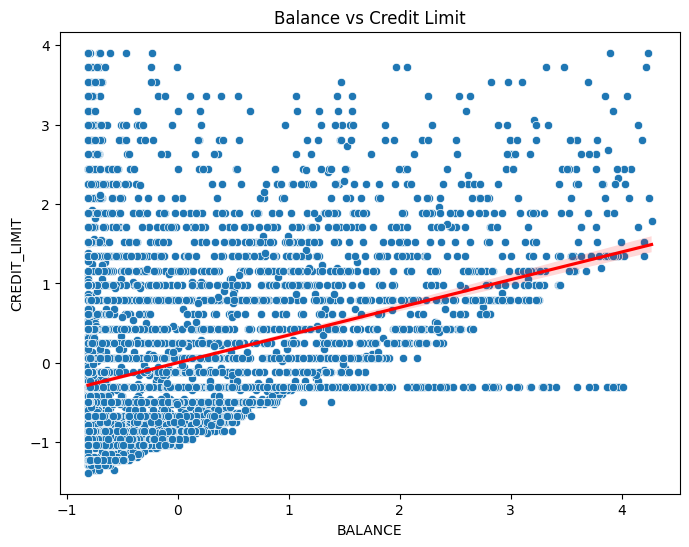

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BALANCE', y='CREDIT_LIMIT', data=df_normalized)
plt.title('Balance vs Credit Limit')
plt.xlabel('Balance (Normalized)')
plt.ylabel('Credit Limit (Normalized)')

# Add a trendline (optional)
sns.regplot(x='BALANCE', y='CREDIT_LIMIT', data=df_normalized, scatter=False, color='red')

plt.show()

Insight 2: Alta variabilidad en los montos de compras (PURCHASES)

**Evidencia estadística:**

  El rango estandarizado de PURCHASES es el más alto (6.976.97), indicando que existen clientes con patrones de gasto muy dispares.

  Esto se ve respaldado por una media cercana a 0, pero una mediana negativa (−0.40), lo que sugiere que la mayoría de los clientes realizan menos compras que el promedio general.

   
**Relevancia para el problema:**

Identificar clientes con gastos altos o atípicos podría ser clave para crear ofertas personalizadas, como descuentos o programas de recompensas. Además, el banco puede identificar clientes con gastos bajos y proponer estrategias para aumentar su uso de la tarjeta.


*Visualización:*
Un histograma para PURCHASES, mostrando la distribución y la posible concentración en ciertos rangos.


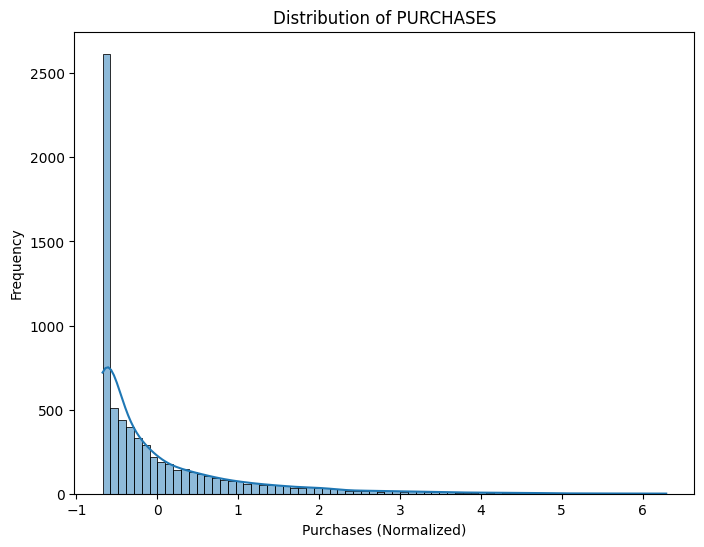

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_normalized is your DataFrame and 'PURCHASES' is the column name
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['PURCHASES'], kde=True)
plt.title('Distribution of PURCHASES')
plt.xlabel('Purchases (Normalized)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Assuming 'df_inputado' is your DataFrame and 'PURCHASES' is the column name
purchase_mode = df_inputado['PURCHASES'].mode()
mode_count = df_inputado['PURCHASES'].value_counts().max()

print(f"La moda de la columna 'PURCHASES' es: {purchase_mode[0]}")
print(f"La moda aparece {mode_count} veces en el dataset.")

La moda de la columna 'PURCHASES' es: 0.0
La moda aparece 2154 veces en el dataset.


Insight 3: Bajo impacto de las compras en la variación del saldo (BALANCE vs. PURCHASES)

**Evidencia estadística:**

La correlación entre BALANCE y PURCHASES es baja (r=0.039), lo que sugiere que el saldo restante no depende directamente de las compras realizadas.

Este comportamiento podría estar influido por otros factores, como los pagos realizados o los adelantos en efectivo.



**Relevancia para el problema:**

Este insight sugiere que Super Bank podría explorar otros factores que impactan el saldo restante, como los pagos o la frecuencia de adelantos en efectivo, para ofrecer mejores estrategias de gestión financiera personalizada.

Visualización:
Un gráfico combinado de líneas que compare la tendencia promedio de BALANCE y PURCHASES por cliente, mostrando la falta de sincronización.

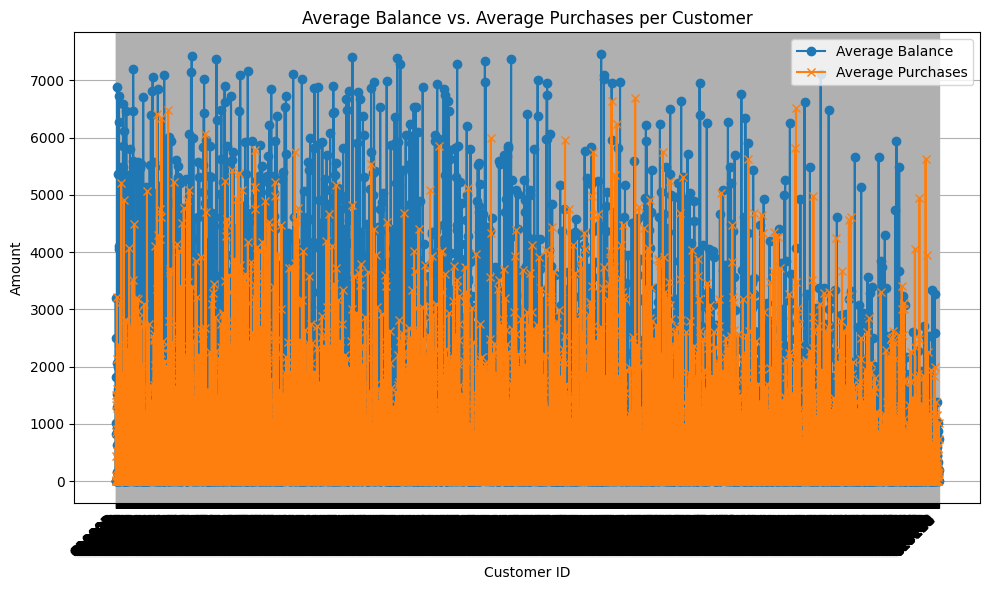

In [ ]:
# Group data by customer (assuming you have a 'CUST_ID' column) and calculate the mean
customer_trends = df_inputado.groupby('CUST_ID')[['BALANCE', 'PURCHASES']].mean().reset_index()

# Create the combined line plot
plt.figure(figsize=(10, 6))
plt.plot(customer_trends['CUST_ID'], customer_trends['BALANCE'], label='Average Balance', marker='o')
plt.plot(customer_trends['CUST_ID'], customer_trends['PURCHASES'], label='Average Purchases', marker='x')

plt.xlabel('Customer ID')
plt.ylabel('Amount')
plt.title('Average Balance vs. Average Purchases per Customer')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 2. CLUSTERING

2.1 Aplicar Clustering

 a. Aplicar el método del codo para determinar el número de clusters adecuado.


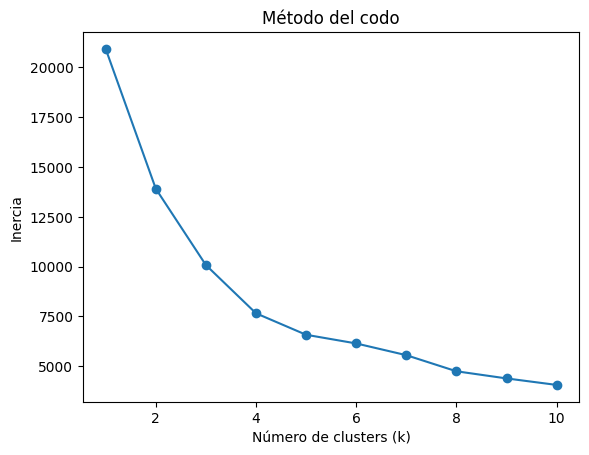

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):  # Probar con diferentes valores de k (número de clusters)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(subset_df)
    inertia.append(kmeans.inertia_)

# 4. Visualización del método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()

De acuerdo al diagrama del codo se considera un k= 4 para realizar 4 clusters.

 b. Aplicar al menos un método de aprendizaje no supervisado para segmentar  clientes.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(subset_df)
subset_df['cluster'] = kmeans.labels_

<ipython-input-109-c8b6c3913157>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualizacion 2D del clustering

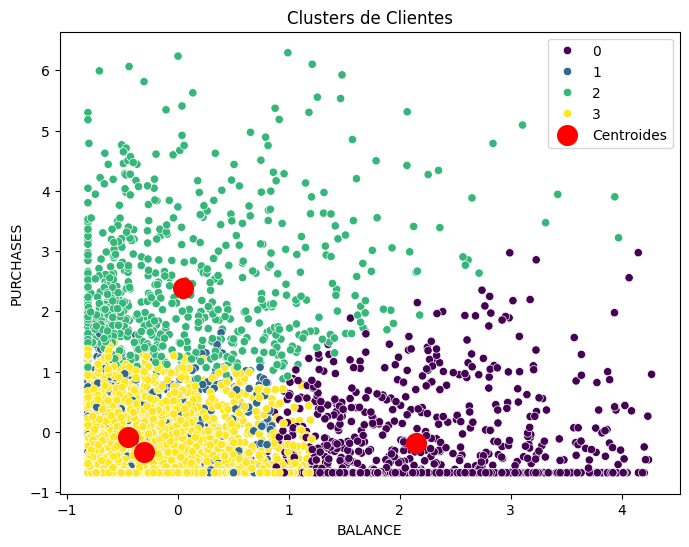

In [ ]:
# Visualización de los clusters con el centroide
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='cluster', data=subset_df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

Visualizacion 3D del clustering

In [ ]:
import plotly.express as px

# Assuming 'subset_df' is your DataFrame with 'BALANCE', 'PURCHASES', 'CREDIT_LIMIT', and 'cluster' columns
fig = px.scatter_3d(subset_df, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', color='cluster',
                    title='3D Scatter Plot of Clusters',
                    labels={'BALANCE': 'Balance', 'PURCHASES': 'Purchases', 'CREDIT_LIMIT': 'Credit Limit'})

fig.update_traces(marker=dict(size=5))  # Adjust marker size for better visualization
fig.show()

**8.Caracterización de Clusters**

 a. Interpretar/describir los grupos obtenidos, proporcionando las gráficas adecuadas.

 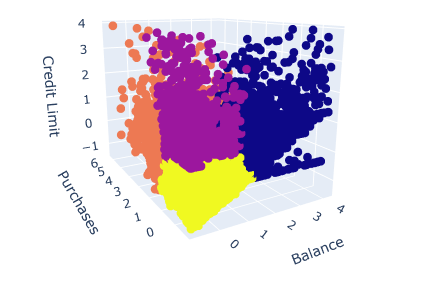

Basándome en el gráfico adjunto, donde se identificaron 4 clusters tras el análisis de clustering, puedo ayudarte a interpretar y describir los grupos obtenidos, destacando las características principales de cada segmento.
Caracterización de Clusters

    Cluster 1 (Color Morado en el gráfico):
        Descripción: Este grupo tiene clientes con niveles de saldo (BALANCE) y límites de crédito (CREDIT_LIMIT) moderados. Sus compras (PURCHASES) son bajas a intermedias.
        Interpretación: Estos podrían ser clientes estables con un uso moderado de la tarjeta de crédito, posiblemente con ingresos medios o control financiero sólido.

    Cluster 2 (Color Amarillo):
        Descripción: Clientes con altos niveles de saldo (BALANCE), pero con bajos límites de crédito (CREDIT_LIMIT) y compras moderadas a bajas.
        Interpretación: Este grupo podría representar clientes en situaciones de alto endeudamiento o usuarios que tienden a acumular saldos sin realizar muchas compras.

    Cluster 3 (Color Azul):
        Descripción: Este grupo tiene clientes con bajos saldos (BALANCE), límites de crédito altos (CREDIT_LIMIT) y niveles altos de compras (PURCHASES).
        Interpretación: Podrían ser clientes de alto poder adquisitivo que utilizan activamente su tarjeta de crédito, posiblemente beneficiándose de recompensas o programas de lealtad.

    Cluster 4 (Color Naranja):
        Descripción: Clientes con niveles bajos de saldo (BALANCE), límites de crédito bajos (CREDIT_LIMIT) y compras moderadas a bajas.
        Interpretación: Podrían ser clientes nuevos, con poca actividad en su tarjeta, o usuarios con ingresos bajos o sin interés en utilizar su crédito de manera frecuente.